# **Laboratorijska vježba 5**: Zadaci za samostalni rad

## **Predviđanje prodaje iz troškova oglasa**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o oglasima u kojima se prodaju određeni proizvodi, a objavljuju se na medijima poput TV-a, radija i novina. Skup podataka sadrži sljedeće stupce:

- TV - cijena za oglašavanje na TV-u za jedan proizvod na određenom tržištu (u tisućama dolara).
- Radio - cijena za oglašavanje na radiju za isti proizvod.
- Newspaper - cijena za oglašavanje u novinama za isti proizvod.
- Sales - prodaja jednog proizvoda na određenom tržištu (u tisućama jedinica).


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import pow, sqrt, log
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [130]:
data = pd.read_csv("data/Advertising.csv", index_col=0)
data.head()
data


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## **Zadatak 1: Linearna regresija: predviđanje prodaje iz troškova oglasa**

Podijelite skup podataka na podskupove za trening i test. Definirajte model linearne regresije pomoću svih značajki, bez izvođenja bilo kakvih transformacija nad značajkama. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.


In [131]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LinearRegression().fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print("MSE - train: ", mean_squared_error(y_train, y_train_predicted))
print("MSE - test: ", mean_squared_error(y_test, y_test_predicted))


MSE - train:  2.479355178905787
MSE - test:  3.7967972367152227


Ispišite jednadžbu modela koristeći izračunate koeficijente.


In [132]:
feature_cols = data.columns[:-1]
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)


0.04405928095746519 * TV + 
0.1992874968989396 * radio + 
0.00688245222227548 * newspaper + 
2.7089490925159083


Nacrtajte dijagram raspršenosti između stvarnih i predviđenih vrijednosti izlazne varijable za podskupove za trening i test.


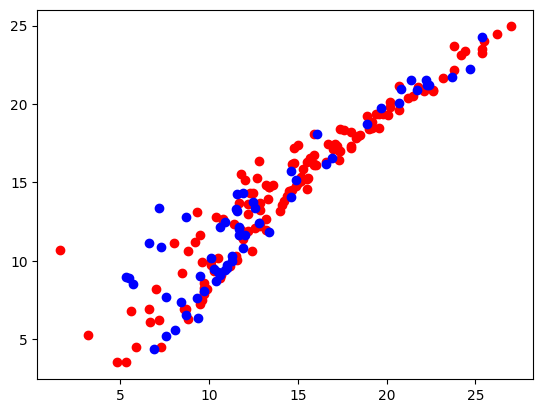

In [133]:
plt.scatter(y_train, y_train_predicted, c="r")
plt.scatter(y_test, y_test_predicted, c="b")
plt.show()


## **Zadatak 2: Nelinearna regresija: predviđanje prodaje iz troškova oglasa**

Definirajte model nelinearne (polinomijalne) regresije sa stupnjem polinoma 2, 3, 5 i 10 bez uključivanja interakcijskih članova. Koristite klasu PolynomialFeatures iz modula preprocessing iz biblioteke scikit-learn. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.


In [134]:
polynoms = [2, 3, 5, 10]

y_p_train = pd.DataFrame()
y_p_test = pd.DataFrame()
MSE_train = []
MSE_test = []

for num in polynoms:
    X_pol = PolynomialFeatures(degree=num, interaction_only=False).fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_pol, y, test_size=0.3, random_state=42
    )
    model = LinearRegression().fit(X_train, y_train)
    y_p_train = model.predict(X_train)
    y_p_test = model.predict(X_test)

    train_MSE = mean_squared_error(y_train, y_p_train)
    test_MSE = mean_squared_error(y_test, y_p_test)

    MSE_train.append(train_MSE)
    MSE_test.append(test_MSE)

    print("MSE - train  {0} : {1}".format(num, train_MSE))
    print("MSE - test   {0} : {1}".format(num, test_MSE))


MSE - train  2 : 0.35410977541934024
MSE - test   2 : 0.5231944949054924
MSE - train  3 : 0.2198445263117743
MSE - test   3 : 0.2907744915173133
MSE - train  5 : 0.14974766998823463
MSE - test   5 : 46.946151056472964
MSE - train  10 : 0.02930922652889892
MSE - test   10 : 251005379612.1116


Iscrtajte izračunate vrijednosti MSE (na treningu i testu) u ovisnosti o složenosti modela. Koristite linijski dijagram.


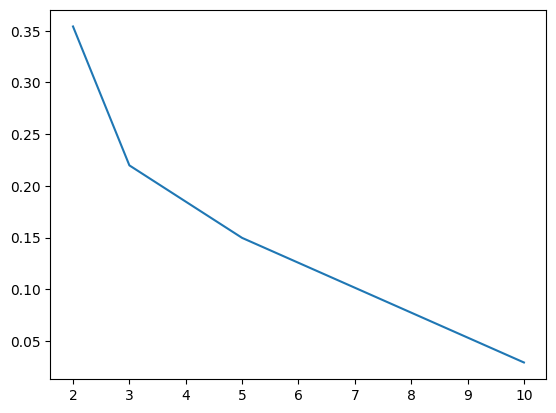

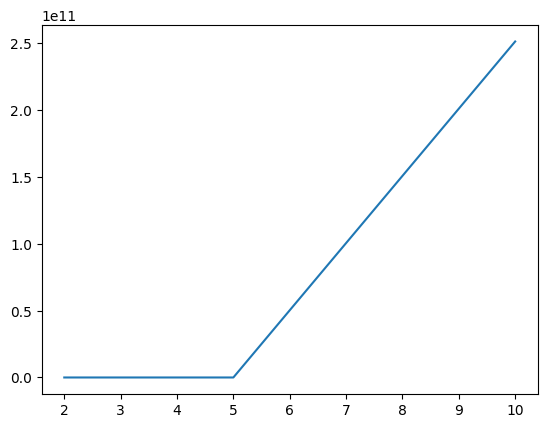

In [136]:
plt.figure()
plt.plot(polynoms, MSE_train)
plt.show()
plt.figure()
plt.plot(polynoms, MSE_test)
plt.show()


Ovaj put uključite interakcijske članove te ponovite treniranje i računanje mjere MSE.


In [137]:
polynoms = [2, 3, 5, 10]

y_p_train = pd.DataFrame()
y_p_test = pd.DataFrame()
MSE_train = []
MSE_test = []

for num in polynoms:
    X_pol = PolynomialFeatures(degree=num, interaction_only=True).fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_pol, y, test_size=0.3, random_state=42
    )
    model = LinearRegression().fit(X_train, y_train)
    y_p_train = model.predict(X_train)
    y_p_test = model.predict(X_test)

    train_MSE = mean_squared_error(y_train, y_p_train)
    test_MSE = mean_squared_error(y_test, y_p_test)

    MSE_train.append(train_MSE)
    MSE_test.append(test_MSE)

    print("MSE - train  {0} : {1}".format(num, train_MSE))
    print("MSE - test   {0} : {1}".format(num, test_MSE))


MSE - train  2 : 0.8476116596934249
MSE - test   2 : 1.0076305070766962
MSE - train  3 : 0.8282466554598643
MSE - test   3 : 1.1532864903358127
MSE - train  5 : 0.8282466554598643
MSE - test   5 : 1.1532864903358127
MSE - train  10 : 0.8282466554598643
MSE - test   10 : 1.1532864903358127


Komentirajte dobivene rezultate. Koji model ima najbolje performanse na podskupu za trening, a koji na testu? Je li za ovaj problem prikladnija polinomijalna regresija od linearne regresije? Imaju li utjecaj interakcijski članovi na performanse modela?


## **Zadatak 3: Preslikavanje u prostor značajki**

Umjesto uvođenja novih (nelinearnih) značajki u model, pokušajte transformirati postojeće značajke. Za početak, za svaku značajku u skupu podataka (TV, Radio, Newspaper), vizualizirajte njezinu vezu s izlaznom varijablom (Sales) pomoću dijagrama raspršenosti.


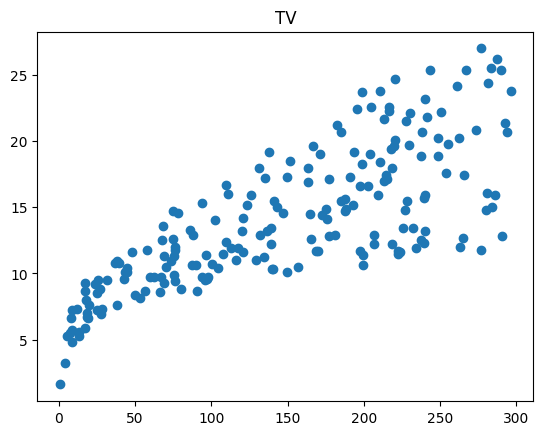

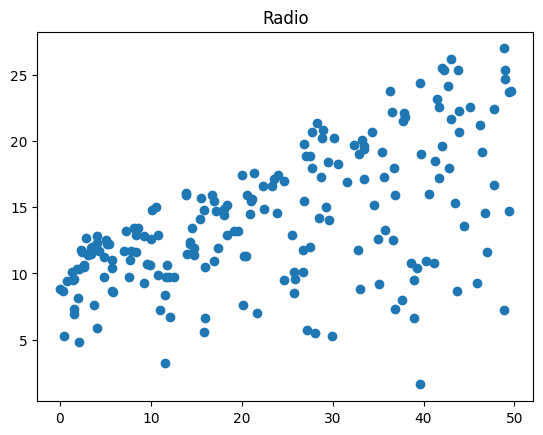

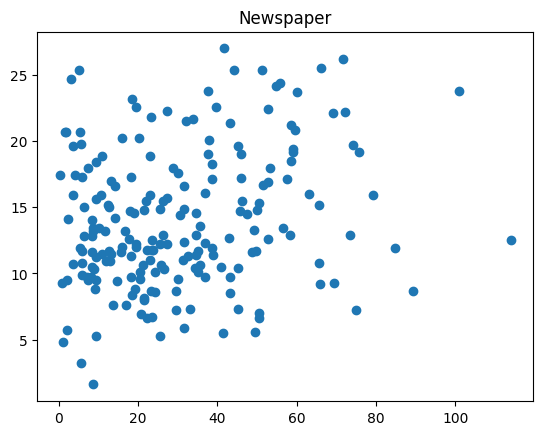

In [138]:
plt.scatter(X.TV, y)
plt.title("TV")
plt.show()

plt.scatter(X.radio, y)
plt.title("Radio")
plt.show()

plt.scatter(X.newspaper, y)
plt.title("Newspaper")
plt.show()


Na temelju ovih dijagrama, pokušajte zaključiti kakva je veza svake značajke i izlazne varijable. Pokušajte isprobati neke transformacije nad postojećim značajkama za koje mislite da će njihovu vezu nad izlaznom varijablom svesti u linearan oblik (primjerice, potenciranje, korjenovanje, logaritmiranje, ...).


In [139]:
Xcopy = X.copy()
Xcopy.TV = np.power(Xcopy.TV, 0.25)
Xcopy.radio = np.power(Xcopy.radio, 0.25)
Xcopy.newspaper = np.power(Xcopy.newspaper, 0.25)


Ponovno vizualizirajte vezu između svake (sada transformirane) značajke i izlazne varijable te provjerite je li došlo do kakvih promjena. Istrenirajte model linearne regresije s takvim značajkama te ga istrenirajte na podskupu za trening. Izračunajte MSE na podskupovima za trening i test.


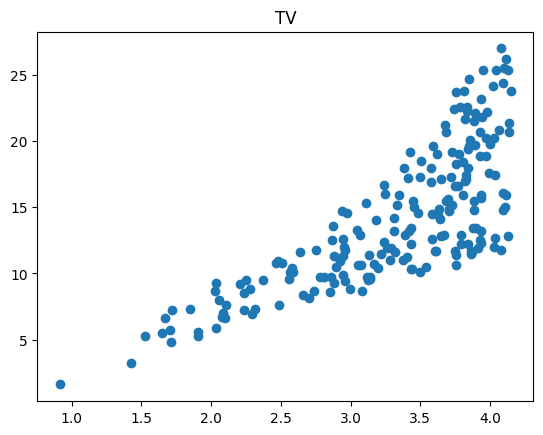

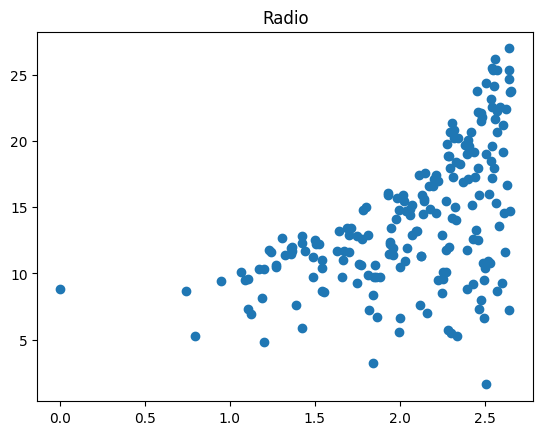

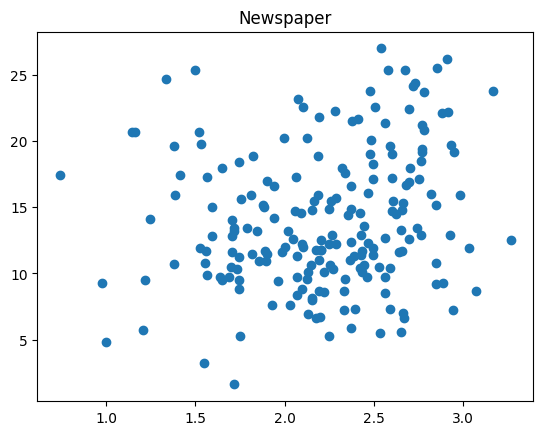

MSE - train: 3.727478561032774
MSE - test: 2.7524471996633633


In [140]:
plt.scatter(Xcopy.TV, y)
plt.title("TV")
plt.show()

plt.scatter(Xcopy.radio, y)
plt.title("Radio")
plt.show()

plt.scatter(Xcopy.newspaper, y)
plt.title("Newspaper")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    Xcopy, y, test_size=0.3, random_state=42
)
model = LinearRegression().fit(X_train, y_train)
y_train_p = model.predict(X_train)
y_test_p = model.predict(X_test)
print("MSE - train:", mean_squared_error(y_train, y_train_p))
print("MSE - test:", mean_squared_error(y_test, y_test_p))
# SQRT - Manji MSE za TEST
# POWER 0.25 - Veci MSE za TRAIN
# POWER 3 - Velik MSE
# LOG10 - Nije moguce


Jeste li uspjeli pronaći neku transformaciju koja poboljšava performanse modela linearne regresije? Prokomentirajte dobivene rezultate.


## **Zadatak 4: Regularizacija**

Kako biste ublažili prenaučenost modela, isprobajte učinak reguralizacije. Testirajte učinak L1 (Lasso) i L2 (Ridge) regularizacije iz biblioteke scikit-learn za gore definirane linearne i nelinearne modele. Možete odabrati najbolji model linearne i najbolji model nelinearne regresije od gore testiranih. Isprobajte nekoliko vrijednosti za parametar $\lambda$. Izračunajte MSE za podskupove za trening i test.


In [144]:
X_train, X_test, y_train, y_test = train_test_split(
    Xcopy, y, test_size=0.3, random_state=42
)
model = LinearRegression().fit(X_train, y_train)
y_train_p = model.predict(X_train)
y_test_p = model.predict(X_test)

print("Bez regularizacije")
print("MSE - train:", mean_squared_error(y_train, y_train_p))
print("MSE - test:", mean_squared_error(y_test, y_test_p))

# L1
steps = [
    ("scalar", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", Lasso(alpha=0.3, fit_intercept=True)),
]

lasso_pipe = Pipeline(steps)

lasso_model = lasso_pipe.fit(X_train, y_train)
y_train_p = lasso_model.predict(X_train)
y_test_p = lasso_model.predict(X_test)

print("L1")
print("MSE - train:", mean_squared_error(y_train, y_train_p))
print("MSE - test:", mean_squared_error(y_test, y_test_p))

# L2
steps = [
    ("scalar", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", Ridge(alpha=10, fit_intercept=True)),
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)
ridge_model = ridge_pipe.fit(X_train, y_train)
y_train_p = ridge_model.predict(X_train)
y_test_p = ridge_model.predict(X_test)

print("L2")
print("MSE - train:", mean_squared_error(y_train, y_train_p))
print("MSE - test:", mean_squared_error(y_test, y_test_p))


Bez regularizacije
MSE - train: 3.727478561032774
MSE - test: 2.7524471996633633
L1
MSE - train: 1.1309034121147787
MSE - test: 0.9823078239373912
L2
MSE - train: 0.7958809841512342
MSE - test: 0.7051768351931585


Prokomentirajte dobivene rezultate. Ima li uvođenje regularizacije učinak na performanse modela linearne i nelinearne regresije za promatrani problem?


## **Zadatak 5: Drugi algoritmi za regresiju**

U biblioteci scikit-learn postoje brojni drugi algoritmi strojnog učenja koji se mogu koristiti za potrebe regresije. Evaluirajte učinkovitost tih algoritma na promatranom problemu. Trenirajte modele SVR, DecisionTreeRegressor i KNeighborsRegressor sa zadanim postavkama parametara. Usporedite njihove performanse na podskupu za test s performansama gore definiranih modela regresije. Uz mjeru MSE, za usporedbu koristite i mjere RMSE i MAE.


In [142]:
svr_model = SVR().fit(X_train, y_train)

y_train_predicted = svr_model.predict(X_train)
y_test_predicted = svr_model.predict(X_test)

print("SVR")
print("MSE - train: ", mean_squared_error(y_train, y_train_predicted))
print("MSE - test: ", mean_squared_error(y_test, y_test_predicted))
print("RMSE - train: ", mean_squared_error(y_train, y_train_predicted, squared=False))
print("RMSE - test: ", mean_squared_error(y_test, y_test_predicted, squared=False))
print("MSE - train: ", mean_absolute_error(y_train, y_train_predicted))
print("MSE - test: ", mean_absolute_error(y_test, y_test_predicted))

dtr_model = DecisionTreeRegressor().fit(X_train, y_train)

y_train_predicted = dtr_model.predict(X_train)
y_test_predicted = dtr_model.predict(X_test)

print("DTR")
print("MSE - train: ", mean_squared_error(y_train, y_train_predicted))
print("MSE - test: ", mean_squared_error(y_test, y_test_predicted))
print("RMSE - train: ", mean_squared_error(y_train, y_train_predicted, squared=False))
print("RMSE - test: ", mean_squared_error(y_test, y_test_predicted, squared=False))
print("MSE - train: ", mean_absolute_error(y_train, y_train_predicted))
print("MSE - test: ", mean_absolute_error(y_test, y_test_predicted))

knr_model = KNeighborsRegressor().fit(X_train, y_train)

y_train_predicted = knr_model.predict(X_train)
y_test_predicted = knr_model.predict(X_test)

print("KNR")
print("MSE - train: ", mean_squared_error(y_train, y_train_predicted))
print("MSE - test: ", mean_squared_error(y_test, y_test_predicted))
print("RMSE - train: ", mean_squared_error(y_train, y_train_predicted, squared=False))
print("RMSE - test: ", mean_squared_error(y_test, y_test_predicted, squared=False))
print("MSE - train: ", mean_absolute_error(y_train, y_train_predicted))
print("MSE - test: ", mean_absolute_error(y_test, y_test_predicted))


SVR
MSE - train:  2.8484992466022936
MSE - test:  2.29056065136892
RMSE - train:  1.6877497582883232
RMSE - test:  1.5134598281318603
MSE - train:  0.9573504305878464
MSE - test:  0.995783255390084
DTR
MSE - train:  0.0
MSE - test:  1.862333333333334
RMSE - train:  0.0
RMSE - test:  1.3646733430873976
MSE - train:  0.0
MSE - test:  1.0200000000000005
KNR
MSE - train:  0.8833142857142854
MSE - test:  1.126853333333334
RMSE - train:  0.9398480120286925
RMSE - test:  1.061533481965281
MSE - train:  0.6571428571428571
MSE - test:  0.7426666666666667
